In [94]:
import numpy as np
import pandas as pd
import kaplanmeier as km
import seaborn as sns
import matplotlib.pyplot as plt

# Bulk RNA data

## Load in data 

In [17]:
GSE78220_qsmoothData = pd.read_csv("GSE78220_normaliserad filer\GSE78220_qsmoothData.csv")
GSE78220_qsmoothData.head()

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\victo\AppData\Local\Temp\ipykernel_15204\3606420091.py:1: SyntaxWarning: invalid escape sequence '\G'
  GSE78220_qsmoothData = pd.read_csv("GSE78220_normaliserad filer\GSE78220_qsmoothData.csv")


,Unnamed: 0,GSM2069823,GSM2069824,GSM2069825,GSM2069826,GSM2069827,GSM2069828,GSM2069829,GSM2069830,GSM2069831,...,GSM2069841,GSM2069842,GSM2069843,GSM2069844,GSM2069845,GSM2069846,GSM2069847,GSM2069848,GSM2069849,GSM2069850
0,100287102,0.075178,0.037371,0.149842,0.056980,0.056895,0.195232,0.151319,0.089389,0.090662,...,0.417996,0.064348,0.079619,0.087768,0.015937,0.054235,0.190020,0.067882,0.195965,0.067981
1,653635,9.547861,9.147401,19.915100,18.841557,17.926226,25.534534,22.759142,19.402012,17.869873,...,31.742982,11.693088,13.490383,21.702285,16.604886,19.263898,24.036982,12.730112,18.578142,21.818015
2,102466751,6.370165,4.234969,18.042972,5.202176,46.597171,25.169295,24.453852,14.603836,13.807700,...,12.914736,7.513887,20.502216,16.098198,31.790083,12.081592,30.723356,8.825804,9.869115,20.494831
3,107985730,0.046761,0.001758,0.169346,0.571587,0.216137,0.125727,0.001090,0.138639,0.235466,...,0.259126,0.000238,0.061547,0.089944,0.049090,0.055995,0.162306,0.069515,0.101184,0.000078
4,100302278,0.169035,0.001758,0.211858,0.003104,0.000170,0.002427,0.001090,0.350213,0.133005,...,0.451773,0.000238,0.000630,0.001111,0.174603,0.000154,0.156353,0.000815,0.001405,0.000078


In [18]:
GSE78220_data_qs = pd.read_csv("GSE78220_normaliserad filer\GSE78220_data_qs.csv", index_col=0)
GSE78220_data_qs.head()

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\victo\AppData\Local\Temp\ipykernel_15204\1586054545.py:1: SyntaxWarning: invalid escape sequence '\G'
  GSE78220_data_qs = pd.read_csv("GSE78220_normaliserad filer\GSE78220_data_qs.csv", index_col=0)


,Symbol,GSM2069823,GSM2069824,GSM2069825,GSM2069826,GSM2069827,GSM2069828,GSM2069829,GSM2069830,GSM2069831,...,GSM2069841,GSM2069842,GSM2069843,GSM2069844,GSM2069845,GSM2069846,GSM2069847,GSM2069848,GSM2069849,GSM2069850
1,A1BG,6.889097,206.466877,5.898350,7.654231,1.852725,12.219533,6.109492,5.098079,3.756723,...,18.963386,3.833460,4.658472,4.263998,4.427123,10.149806,8.627985,7.817892,10.433869,2.584879
2,NAT2,0.028758,16.464292,0.111024,0.285515,0.068164,0.046852,0.030736,0.035267,0.020655,...,0.085310,0.013973,0.021301,0.320494,0.101194,0.000154,0.018377,0.024080,0.001405,0.007132
3,ADA,11.332855,6.897428,14.844041,21.061137,3.651512,10.520665,8.282411,8.544901,10.679005,...,32.032146,5.598783,2.756178,14.181502,9.609500,21.131104,11.572463,18.983650,29.857904,26.302853
4,CDH2,22.011609,15.190255,44.594648,10.013215,4.825417,0.103632,1.365131,1.165910,46.302287,...,1.535061,24.661559,21.066053,0.341010,1.701542,1.577429,44.820329,0.258317,12.414237,3.944813
5,AKT3,48.313567,34.701721,30.998345,34.584468,11.981855,17.890281,8.890926,11.400316,21.787557,...,8.918915,23.085954,31.244420,2.556953,10.773940,15.346811,16.036611,16.696718,22.012087,5.102058


In [123]:
GSE78220_qs_metadata = pd.read_csv("GSE78220_normaliserad filer\GSE78220_qs_metadata.csv")
GSE78220_qs_metadata.rename(columns={'Unnamed: 0':'Mixture'}, inplace=True)
GSE78220_qs_metadata.head()

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\victo\AppData\Local\Temp\ipykernel_15204\1072604175.py:1: SyntaxWarning: invalid escape sequence '\G'
  GSE78220_qs_metadata = pd.read_csv("GSE78220_normaliserad filer\GSE78220_qs_metadata.csv")


,Mixture,ID_REF,source_name,tissue,response,treatment,biopsy_time,previous_mapki,sex,age,...,X4556,X4519,X4576,X4571,SIAC1QB,SIAC1QA,SIAC1QC,SIAC1QAC,response_ordinal,response2
0,GSM2069823,Pt1,tumor biopsy_Progressive Disease,Melanoma biopsies,Progressive Disease,Pembrolizumab,pre-treatment,N,F,66,...,1251.663976,3117.831450,39.765223,697.975257,0.024704,0.023254,0.031563,0.008683,Progressive Disease,Non-response
1,GSM2069824,Pt2,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,N,M,55,...,1672.906289,7309.439300,84.670507,879.509532,0.028389,0.037026,0.036886,0.011193,Partial Response,Response
2,GSM2069825,Pt4,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,Y,M,62,...,2710.457635,13147.955825,273.769071,2890.617786,0.029880,0.024970,0.028878,0.009247,Partial Response,Response
3,GSM2069826,Pt5,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,N,M,61,...,71.076374,167.690889,3.651914,50.839306,0.012998,0.017261,0.017357,0.005195,Partial Response,Response
4,GSM2069827,Pt6,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,Y,M,51,...,4322.250809,15247.764765,440.559240,3920.757318,0.002482,0.002571,0.002190,0.000801,Partial Response,Response


In [20]:
GSE78220_metadata3 = pd.read_csv("GSE78220_normaliserad filer\GSE78220_metadata3.csv")
GSE78220_metadata3.head()

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\victo\AppData\Local\Temp\ipykernel_15204\1415554679.py:1: SyntaxWarning: invalid escape sequence '\G'
  GSE78220_metadata3 = pd.read_csv("GSE78220_normaliserad filer\GSE78220_metadata3.csv")


,Unnamed: 0,ID_REF,source_name,tissue,response,treatment,biopsy_time,previous_mapki,sex,age,...,X.Sample_contact_institute,X.Sample_contact_address,X.Sample_contact_city,X.Sample_contact_state,X.Sample_contact_zip.postal_code,X.Sample_contact_country,X.Sample_data_row_count,X.Sample_instrument_model,X.Sample_library_selection,X.Sample_library_source
0,GSM2069823,Pt1,tumor biopsy_Progressive Disease,Melanoma biopsies,Progressive Disease,Pembrolizumab,pre-treatment,N,F,66,...,"UCLA Division of Dermatology 52-121 CHS, 10833...",Los Angeles,California,90066,USA,0,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq
1,GSM2069824,Pt2,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,N,M,55,...,"UCLA Division of Dermatology 52-121 CHS, 10833...",Los Angeles,California,90066,USA,0,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq
2,GSM2069825,Pt4,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,Y,M,62,...,"UCLA Division of Dermatology 52-121 CHS, 10833...",Los Angeles,California,90066,USA,0,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq
3,GSM2069826,Pt5,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,N,M,61,...,"UCLA Division of Dermatology 52-121 CHS, 10833...",Los Angeles,California,90066,USA,0,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq
4,GSM2069827,Pt6,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,Y,M,51,...,"UCLA Division of Dermatology 52-121 CHS, 10833...",Los Angeles,California,90066,USA,0,Illumina HiSeq 2000,cDNA,transcriptomic,RNA-Seq


## Calculate celltype SIA

In [124]:
deconvolved_data_ciber = pd.read_csv("CIBERSORT_deconvolved_GSE78220.csv")
deconvolved_data_ciber.head()

,Mixture,Malignant,Endothelial cells,CAF,T cells CD8,NK cells,Macrophages,T cells CD4,B cells,P-value,Correlation,RMSE
0,GSM2069823,0.583072,0.017125,0.287329,0.004688,0.0,0.087975,0.008812,0.010999,0,0.476497,0.879068
1,GSM2069824,0.743163,0.018499,0.032298,0.007606,0.0,0.187097,0.011337,0.000000,0,0.127431,1.103183
2,GSM2069825,0.858987,0.000334,0.039995,0.005105,0.0,0.093667,0.000880,0.001032,0,0.743819,0.684138
3,GSM2069826,0.976568,0.000528,0.007294,0.000000,0.0,0.013782,0.001827,0.000000,0,0.687683,0.728626
4,GSM2069827,0.816200,0.000453,0.067759,0.000000,0.0,0.107401,0.008187,0.000000,0,0.679527,0.740109


In [125]:
# Calculate celltype-based SIA score
deconvolved_data_ciber["SIA celltype"] = deconvolved_data_ciber["T cells CD8"] / deconvolved_data_ciber["Macrophages"]
deconvolved_data_ciber.head()

,Mixture,Malignant,Endothelial cells,CAF,T cells CD8,NK cells,Macrophages,T cells CD4,B cells,P-value,Correlation,RMSE,SIA celltype
0,GSM2069823,0.583072,0.017125,0.287329,0.004688,0.0,0.087975,0.008812,0.010999,0,0.476497,0.879068,0.053289
1,GSM2069824,0.743163,0.018499,0.032298,0.007606,0.0,0.187097,0.011337,0.000000,0,0.127431,1.103183,0.040655
2,GSM2069825,0.858987,0.000334,0.039995,0.005105,0.0,0.093667,0.000880,0.001032,0,0.743819,0.684138,0.054501
3,GSM2069826,0.976568,0.000528,0.007294,0.000000,0.0,0.013782,0.001827,0.000000,0,0.687683,0.728626,0.000000
4,GSM2069827,0.816200,0.000453,0.067759,0.000000,0.0,0.107401,0.008187,0.000000,0,0.679527,0.740109,0.000000


In [126]:
# Merge the 
GSE78220_qs_metadata["SIA celltype"] = deconvolved_data_ciber["SIA celltype"]
GSE78220_qs_metadata.head()

,Mixture,ID_REF,source_name,tissue,response,treatment,biopsy_time,previous_mapki,sex,age,...,X4519,X4576,X4571,SIAC1QB,SIAC1QA,SIAC1QC,SIAC1QAC,response_ordinal,response2,SIA celltype
0,GSM2069823,Pt1,tumor biopsy_Progressive Disease,Melanoma biopsies,Progressive Disease,Pembrolizumab,pre-treatment,N,F,66,...,3117.831450,39.765223,697.975257,0.024704,0.023254,0.031563,0.008683,Progressive Disease,Non-response,0.053289
1,GSM2069824,Pt2,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,N,M,55,...,7309.439300,84.670507,879.509532,0.028389,0.037026,0.036886,0.011193,Partial Response,Response,0.040655
2,GSM2069825,Pt4,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,Y,M,62,...,13147.955825,273.769071,2890.617786,0.029880,0.024970,0.028878,0.009247,Partial Response,Response,0.054501
3,GSM2069826,Pt5,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,N,M,61,...,167.690889,3.651914,50.839306,0.012998,0.017261,0.017357,0.005195,Partial Response,Response,0.000000
4,GSM2069827,Pt6,tumor biopsy_Partial Response,Melanoma biopsies,Partial Response,Pembrolizumab,pre-treatment,Y,M,51,...,15247.764765,440.559240,3920.757318,0.002482,0.002571,0.002190,0.000801,Partial Response,Response,0.000000


In [127]:
# Change the name of the column to match the figure in the article
response_mapper = {
    "Progressive Disease": "non-responder",
    "Partial Response": "partial respose",
    "Complete Response": "responder",
}
GSE78220_qs_metadata["response"] = GSE78220_qs_metadata["response_ordinal"].apply(lambda x: response_mapper[x])

plot_columns = ["SIAC1QA", "SIAC1QB", "SIAC1QC", "SIA celltype", "response", "ID_REF"]

# Select the necessary data and order it in the same way as in the article
plot_data = pd.concat([GSE78220_qs_metadata[plot_columns]], axis=1)
# plot_data = plot_data[["SIAC1QA", "SIAC1QB", "SIAC1QC", "response", "ID_REF"]]

# Handle the patient with two samples
new_row = pd.DataFrame(
    {
    'SIAC1QA': np.array([plot_data.loc[19, 'SIAC1QA'], plot_data.loc[20, 'SIAC1QA']]).mean(),
    'SIAC1QB': np.array([plot_data.loc[19, 'SIAC1QB'], plot_data.loc[20, 'SIAC1QB']]).mean(),
    'SIAC1QC': np.array([plot_data.loc[19, 'SIAC1QC'], plot_data.loc[20, 'SIAC1QC']]).mean(),
    'SIA celltype': np.array([plot_data.loc[19, 'SIA celltype'], plot_data.loc[20, 'SIA celltype']]).mean(),
    'response': 'responder',
    'ID_REF': 'Pt27A_Pt27B'
    },
    index=[0]
)
plot_data = plot_data.drop(plot_data[plot_data['ID_REF'].isin(['Pt27A', 'Pt27B'])].index)

plot_data = pd.concat([plot_data, new_row], ignore_index=True)
plot_data.drop("ID_REF", axis=1, inplace=True)
plot_data.head()


,SIAC1QA,SIAC1QB,SIAC1QC,SIA celltype,response
0,0.023254,0.024704,0.031563,0.053289,non-responder
1,0.037026,0.028389,0.036886,0.040655,partial respose
2,0.024970,0.029880,0.028878,0.054501,partial respose
3,0.017261,0.012998,0.017357,0.000000,partial respose
4,0.002571,0.002482,0.002190,0.000000,partial respose


C:\Users\victo\AppData\Local\Temp\ipykernel_15204\945430193.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='response', y=column, data=plot_data, jitter=True, palette='Set1', ax=axes[i], size=10, alpha=0.7, edgecolor="black", linewidth=1)
C:\Users\victo\AppData\Local\Temp\ipykernel_15204\945430193.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='response', y=column, data=plot_data, jitter=True, palette='Set1', ax=axes[i], size=10, alpha=0.7, edgecolor="black", linewidth=1)
C:\Users\victo\AppData\Local\Temp\ipykernel_15204\945430193.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

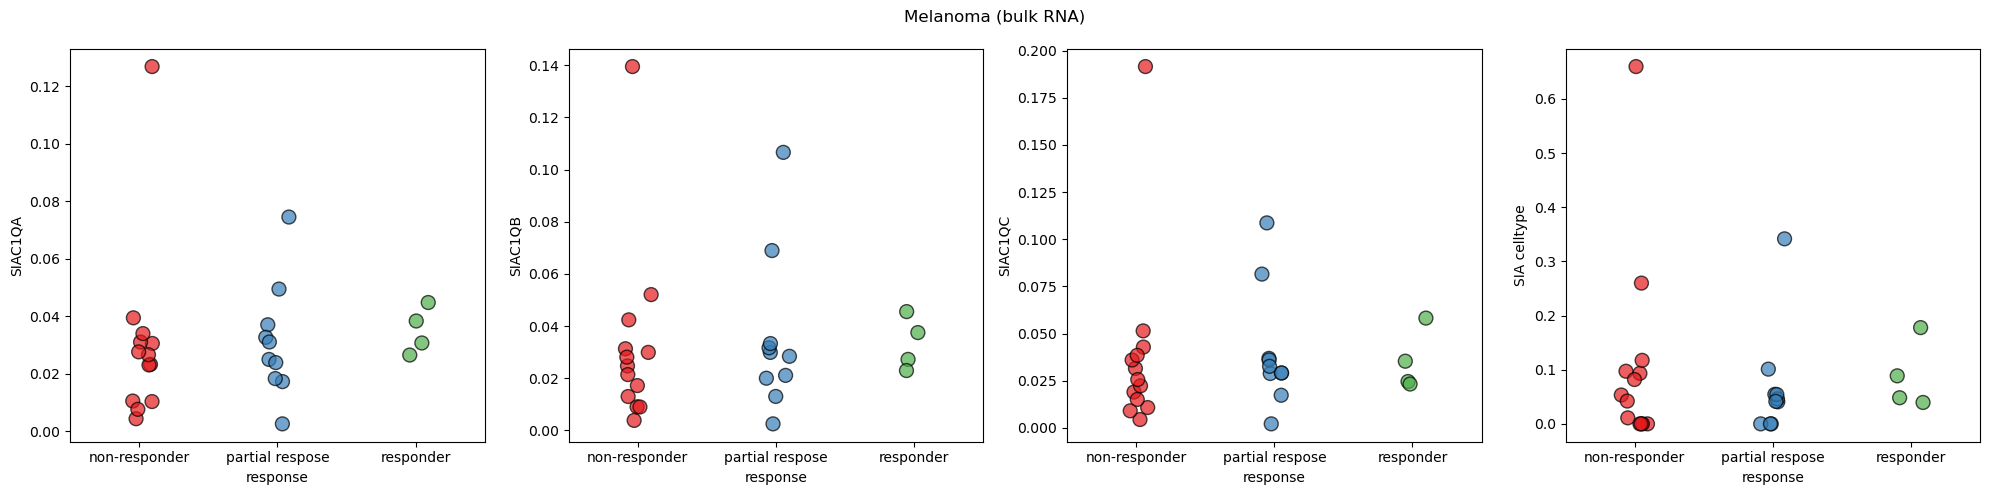

In [128]:
# Create subplots
fig, axes = plt.subplots(1, len(plot_data.columns)-1, figsize=(20, 5))

# Iterate over columns in plot_data
for i, column in enumerate(plot_data.columns[:-1]):
    # Plot strip plot for each column
    sns.stripplot(x='response', y=column, data=plot_data, jitter=True, palette='Set1', ax=axes[i], size=10, alpha=0.7, edgecolor="black", linewidth=1)

fig.suptitle("Melanoma (bulk RNA)")
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
